# Visualise the test data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib.cm import get_cmap

In [5]:
file_path = '/home/ben/reef-audio-representation-learning/data/dataset.json'

# Read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

/tmp/ipykernel_405090/1688307756.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20b', len(all_classes))


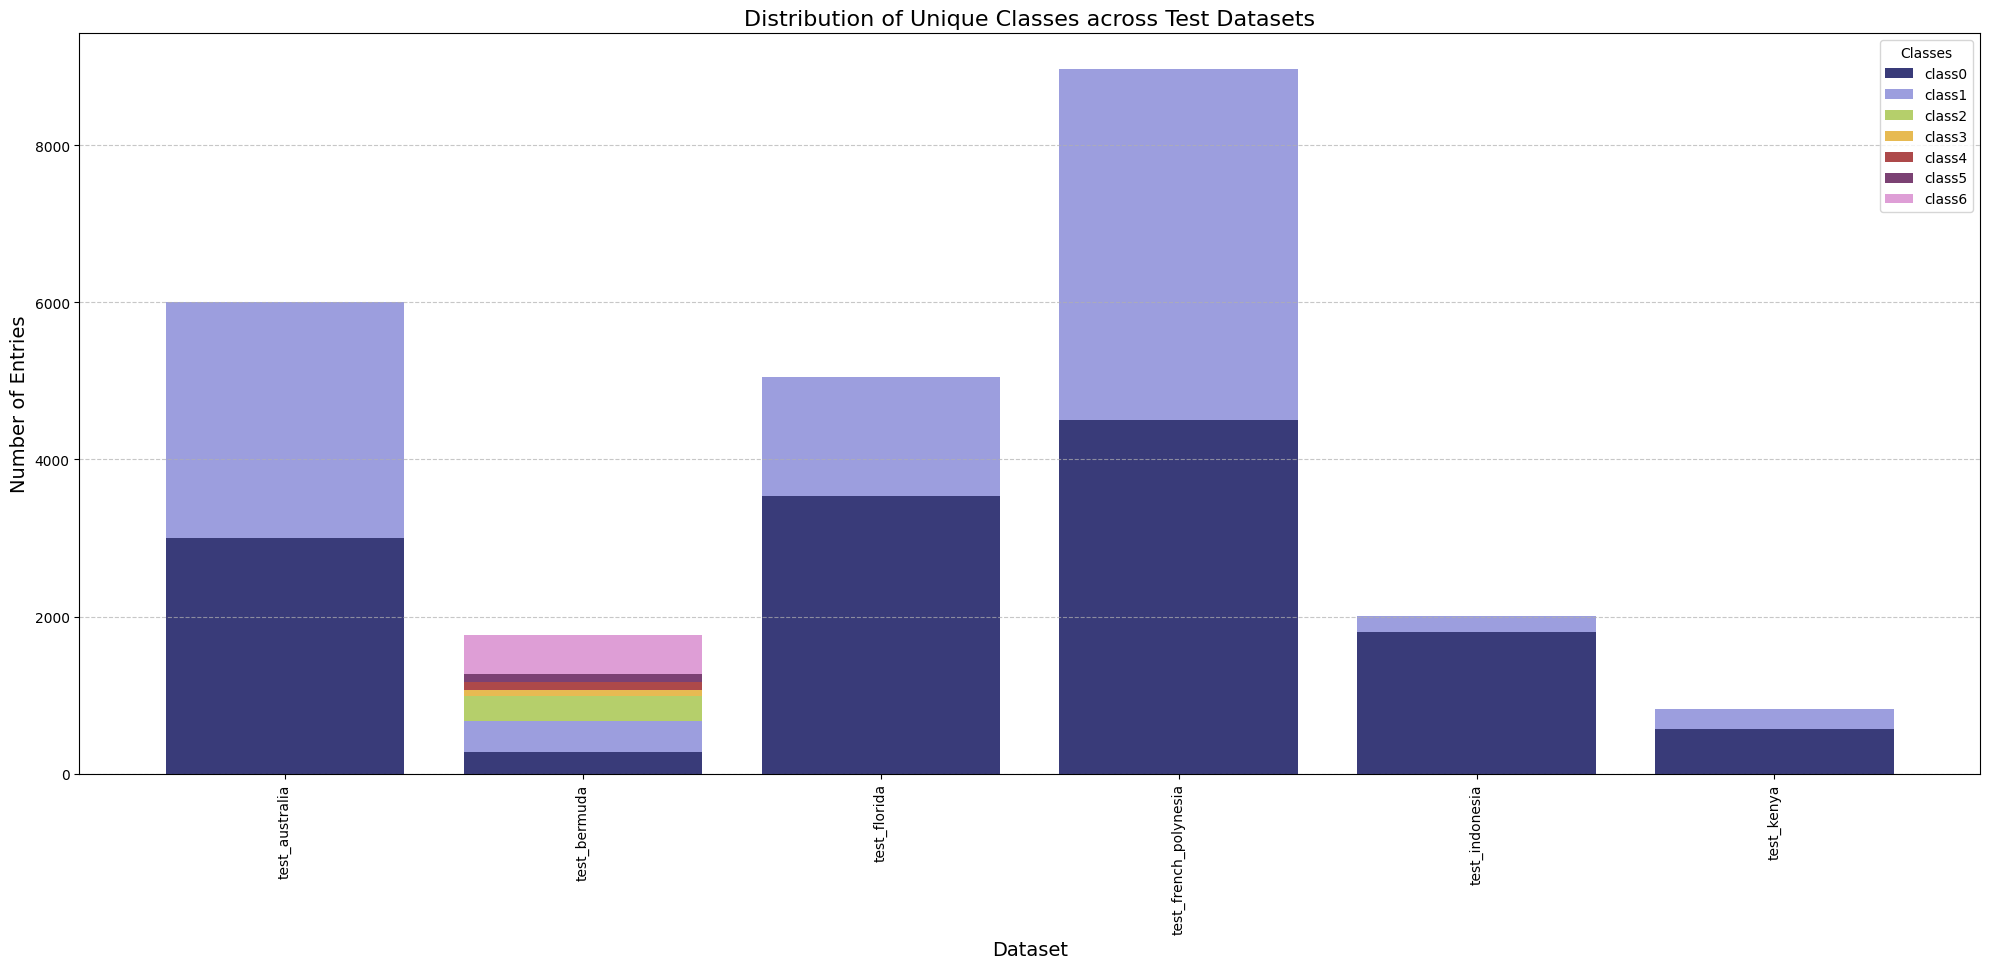

In [11]:
# Extract the key containing the data entries
data_key = list(data.keys())[0]
data_entries = data[data_key]

# Grouping the data by "dataset," "data_type," and then by "class" or "annotation_class"
stacked_grouping = {'test_data': {}}
all_classes = set()

for entry in data_entries:
    dataset = entry['dataset']
    data_type = entry['data_type']
    
    # Skip any non-test data
    if data_type != 'test_data':
        continue
    
    data_class = entry['class'] if 'class' in entry else None
    annotation_class = entry['annotation_class'] if 'annotation_class' in entry else None
    class_key = data_class or annotation_class or 'unknown'
    all_classes.add(class_key)
    
    if dataset not in stacked_grouping[data_type]:
        stacked_grouping[data_type][dataset] = {}
    stacked_grouping[data_type][dataset][class_key] = stacked_grouping[data_type][dataset].get(class_key, 0) + 1


# Desired order for the datasets
dataset_order = ['test_kenya', 'test_bermuda', 'test_florida', 'test_indonesia', 'test_australia', 'test_polynesia']

# Modify the data processing loop to sort the datasets in the desired order
stacked_grouping_sorted = {'test_data': {dataset: stacked_grouping['test_data'].get(dataset, {}) for dataset in dataset_order}}

# Modify the plot_stacked_counts function to handle ordered datasets
def plot_stacked_counts(data_grouping, color_palette):
    for i, (dataset, class_counts) in enumerate(data_grouping.items()):
        bottom_value = 0
        handles = []
        for class_key, count in class_counts.items():
            bar = plt.bar(i, count, bottom=bottom_value, color=color_palette[class_key], label=class_key)
            handles.append(bar)
            bottom_value += count
        
        # Create a legend for each individual bar
        plt.legend(handles=handles, labels=list(class_counts.keys()), 
                   loc="upper left", bbox_to_anchor=(i-0.25, 1), title=dataset, fontsize=8)


# Creating a consistent color palette for classes
cmap = get_cmap('tab20b', len(all_classes))
color_palette_consistent = {class_key: cmap(i) for i, class_key in enumerate(sorted(all_classes))}

# Extracting test labels
test_labels = list(stacked_grouping['test_data'].keys())




# Creating the plot
plt.figure(figsize=[20, 10])

# Plotting test data
plot_stacked_counts(stacked_grouping['test_data'], color_palette_consistent)

# add legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = sorted(set(labels), key=labels.index)
unique_handles = [handles[labels.index(l)] for l in unique_labels]
plt.legend(unique_handles, unique_labels, title="Classes")

# Adding labels, title
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)
plt.title('Distribution of Unique Classes across Test Datasets', fontsize=16)
plt.xticks(ticks=range(len(test_labels)), labels=test_labels, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout
plt.tight_layout(rect=[0, 0.02, 1, 1]) # Making room for the x-axis labels
plt.show()


### Get exact numbers in each class

In [13]:
def print_dataset_info(dataset_name, data_grouping):
    """
    Prints out the classes and their respective counts for a given dataset.
    
    Args:
    - dataset_name (str): Name of the dataset.
    - data_grouping (dict): Dictionary containing the grouped data information.
    """
    if dataset_name in data_grouping:
        print(f"Information for {dataset_name}:")
        for class_name, count in data_grouping[dataset_name].items():
            print(f"  Class: {class_name}, Count: {count}")
    else:
        print(f"No information found for {dataset_name}.")

In [14]:
# kenya
print_dataset_info('test_kenya', stacked_grouping_sorted['test_data'])

Information for test_kenya:
  Class: class0, Count: 563
  Class: class1, Count: 258


In [15]:
# kenya
print_dataset_info('test_bermuda', stacked_grouping_sorted['test_data'])

Information for test_bermuda:
  Class: class0, Count: 270
  Class: class1, Count: 397
  Class: class2, Count: 326
  Class: class3, Count: 76
  Class: class4, Count: 102
  Class: class5, Count: 91
  Class: class6, Count: 497
